In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Подгрузка данных из файла, переименование колонок и конвертация даты

In [3]:
yandex_images = pd.read_csv("data.tsv", delimiter="\t",header=None)
yandex_images.rename(columns={0:"request", 1:"date", 2:"platform"},inplace=True)
yandex_images['date'] = pd.to_datetime(yandex_images['date'],unit='s')
yandex_images.head()

,request,date,platform
0,порно фото,2021-09-16 10:04:57,touch
1,малевич картины,2021-09-16 15:34:25,desktop
2,Секс,2021-09-16 08:39:43,touch
3,с днём рождения лена,2021-09-16 05:52:43,touch
4,зверополис порно,2021-09-16 10:19:59,touch


In [4]:
# Выгрузить данные в csv
# yandex_images.to_csv("yi.csv", sep="\t")

### Границы диапазона

In [5]:
# Границы диапазона (по местному времени хоста)
start = yandex_images.date.min()
stop = yandex_images.date.max()
print(f"Start: {start}\nEnd: {stop}")

Start: 2021-08-31 21:00:00
End: 2021-09-21 20:59:59


### Общее число записей и по платформам

In [6]:
print(f'All: {yandex_images.shape}')
print(f'Touch: {yandex_images[yandex_images.platform == "touch"].shape}')
print(f'Desktop: {yandex_images[yandex_images.platform == "desktop"].shape}')

All: (1203824, 3)
Touch: (792258, 3)
Desktop: (411566, 3)


In [7]:
# Количество запросов по платформам
yandex_images.groupby('platform').agg({'request':'count'})

,request
platform,
desktop,411566
touch,792258


In [8]:
# Проверка на пустые значения по дате
yandex_images[yandex_images.date.isna()]

,request,date,platform


In [9]:
# Количество запросов "ютуб" на тачах
yandex_images[(yandex_images.platform == 'touch')&(yandex_images['request'].str.contains('ютуб'))].shape

(597, 3)

In [10]:
# Количество запросов на тему "ютуб" на тачах
youtube = ["ютуб", "Ютуб", "youtu", "Youtu", "YouTu"]
c = 0
for i in youtube:
    c += yandex_images[(yandex_images.platform == 'touch')&(yandex_images['request'].str.contains(i))].shape[0]
print(c)

933


### Количество запросов "ютуб"

In [11]:
# Количество запросов "ютуб" по платформам
yandex_images[yandex_images['request'].str.contains('ютуб')].groupby('platform').agg({'request':'count'})

,request
platform,
desktop,802
touch,597


### Топ 10 запросов на десктопах

In [12]:
# Топ 10 запросов по десктопу
yandex_images[yandex_images.platform == "desktop"].groupby('request', as_index=True).agg({'date':'count'}).sort_values('date', ascending=False).head(10)

,date
request,
календарь 2021,2804
таблица менделеева,2631
картинки,1647
порно,1342
английский алфавит,1293
обои на рабочий стол,1143
Одноклассники (социальная сеть),1116
секс,895
таблица квадратов,877


### Топ 10 запросов на тачах

In [13]:
# Топ 10 запросов по тачам
yandex_images[yandex_images.platform == "touch"].groupby('request', as_index=True).agg({'platform': 'count'}).sort_values('platform', ascending=False).head(10)

,platform
request,
порно,7740
секс,6348
с днём рождения женщине,4903
с днём рождения,3967
с днём рождения мужчине,3623
хентай,3157
с днем рождения,3005
xxx,2429
Порно,2330


### Вывод по топу запросов.
На десктопах больше запросов рабочего характера, чем личного

На тачах преобладают запросы личного характера.

In [14]:
# трафик запросов

In [15]:
yandex_images.index = yandex_images.date
yandex_images.head()

,request,date,platform
date,,,
2021-09-16 10:04:57,порно фото,2021-09-16 10:04:57,touch
2021-09-16 15:34:25,малевич картины,2021-09-16 15:34:25,desktop
2021-09-16 08:39:43,Секс,2021-09-16 08:39:43,touch
2021-09-16 05:52:43,с днём рождения лена,2021-09-16 05:52:43,touch
2021-09-16 10:19:59,зверополис порно,2021-09-16 10:19:59,touch


<Axes: xlabel='date'>

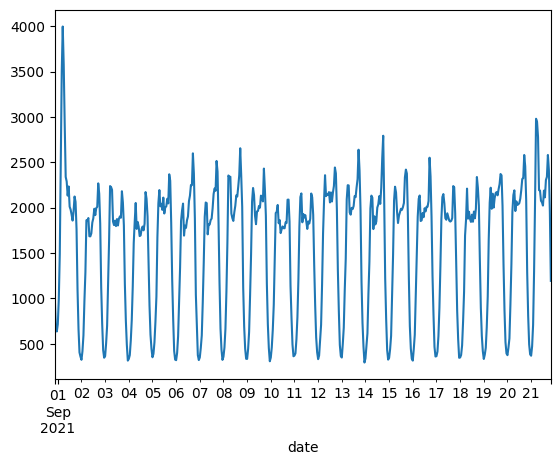

In [ ]:
# Количество запросов по часам для тачей
yandex_images[yandex_images.platform == "touch"].resample('h').request.count().plot()

<Axes: xlabel='date'>

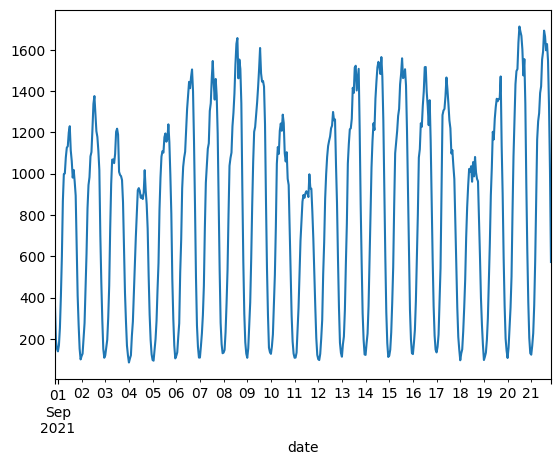

In [20]:
# Количество запросов по часам для десктопов
yandex_images[yandex_images.platform == "desktop"].resample('h').request.count().plot()

### Анализ количества запросов по платформам

#### Мобильные утройства

Незначительные колебания по дням недели. Выраженные колебания в зависимости от времени суток. Больше активности в начале и конце дня, чем в середине.

#### Настольные компьютеры

Выраженные колебания по дням недели. На выходных запросов меньше. Основная активность днём.

#### Вывод

Настольные компьютеры чаще используют для решения рабочих задач, а мобильные утройсва для личных.
